In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import numpy as np
from google.colab import drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Summer Class/Survery form.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,Select your age group,"On average, how many different technology tools or platforms (apps, websites, tools) do you use daily for academic purposes?","Do you use AI-based tools (e.g., ChatGPT, Copilot, Bard) for academic work at least once a week?",How much do you think technology helps improve your academic productivity?,Which category of tools do you believe contributes the most to your academic performance?,Which of these tools/platforms do you use at least once a day for academic work?\n(Select multiple if required),Name one specific technology that has helped you the most academically and briefly explain why.
0,2025/07/30 11:13:49 PM GMT+5:45,18–21,4,Yes,5,"AI tools (e.g., ChatGPT, Bard)",ChatGPT/Claude/Grock,AI
1,2025/07/30 11:16:26 PM GMT+5:45,18–21,6 or more,Yes,5,"AI tools (e.g., ChatGPT, Bard)",ChatGPT/Claude/Grock,Chatgpt as it explains in such a way that i un...
2,2025/07/30 11:19:48 PM GMT+5:45,18–21,4,Yes,5,"AI tools (e.g., ChatGPT, Bard)",ChatGPT/Claude/Grock,Chatgpt. It is because it gives the exact answ...
3,2025/07/30 11:20:19 PM GMT+5:45,18–21,6 or more,Yes,5,"Learning platforms (e.g., Moodle, Coursera)",ChatGPT/Claude/Grock,Chatgpt because we got instant answer
4,2025/07/30 11:24:45 PM GMT+5:45,18–21,3,Yes,5,"AI tools (e.g., ChatGPT, Bard)",ChatGPT/Claude/Grock,Chatgpt


In [11]:
# Extracting and cleaning the productivity rating column
df_productivity = df["How much do you think technology helps improve your academic productivity?"].astype(int)
print(df_productivity)

0     5
1     5
2     5
3     5
4     5
5     3
6     5
7     5
8     5
9     5
10    4
11    5
12    4
13    5
14    5
15    4
16    4
17    4
18    5
19    1
20    4
21    4
22    4
23    4
Name: How much do you think technology helps improve your academic productivity?, dtype: int64


/tmp/ipython-input-2854461182.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empirical_pmf.index, y=empirical_pmf.values, palette="Blues_d")


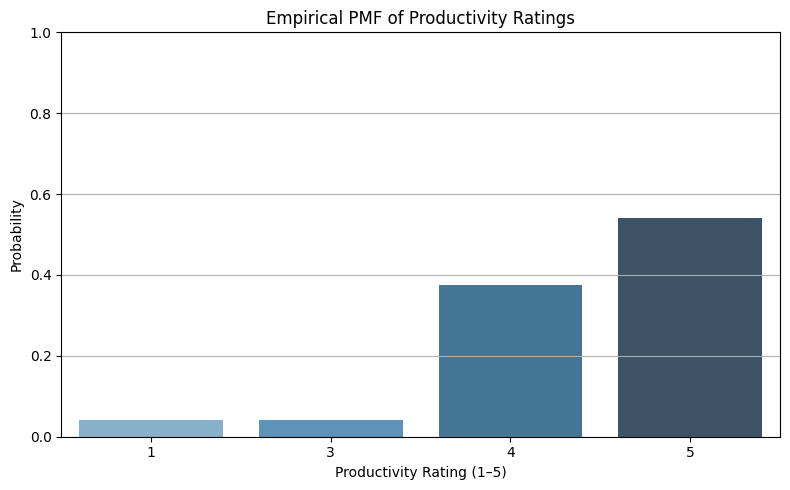

In [17]:
#Calculating Empirical PMF
empirical_counts = df_productivity.value_counts().sort_index()
total_responses = len(df_productivity)
empirical_pmf = empirical_counts / total_responses

# Plotting Empirical PMF

plt.figure(figsize=(8, 5))
sns.barplot(x=empirical_pmf.index, y=empirical_pmf.values, palette="Blues_d")
plt.title("Empirical PMF of Productivity Ratings")
plt.xlabel("Productivity Rating (1–5)")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [16]:
#Summary statistics
mean = df_productivity.mean()
variance = df_productivity.var()
print(f"Mean: {mean}")
print(f"Variance: {variance}")

Mean: 4.375
Variance: 0.8532608695652174


In [22]:
#Theoretical PMF using Binomial Distribution
#Converting ratings 1–5 → 0–4 for binomial modeling
ratings_shifted = df_productivity - 1
p_hat = ratings_shifted.mean() / 4  # Since n = 4 (0–4 scale)
print(f"Estimated p̂: {p_hat:.4f}")

# Computing theoretical PMF
n = 4
theoretical_pmf = [binom.pmf(k, n, p_hat) for k in range(5)]  # 0 to 4 → corresponds to rating 1 to 5

# Ensuring empirical PMF has all rating levels
full_index = pd.Index([1, 2, 3, 4, 5])
empirical_pmf = empirical_pmf.reindex(full_index, fill_value=0)

# Comparing in a table
comparison_df = pd.DataFrame({
    "Productivity Rating": [1, 2, 3, 4, 5],
    "Empirical PMF": empirical_pmf.values,
    "Theoretical PMF (Binomial)": theoretical_pmf
})
print("\n--- PMF Comparison Table ---")
print(comparison_df)

Estimated p̂: 0.8438

--- PMF Comparison Table ---
   Productivity Rating  Empirical PMF  Theoretical PMF (Binomial)
0                    1       0.041667                    0.000596
1                    2       0.000000                    0.012875
2                    3       0.041667                    0.104284
3                    4       0.375000                    0.375423
4                    5       0.541667                    0.506822


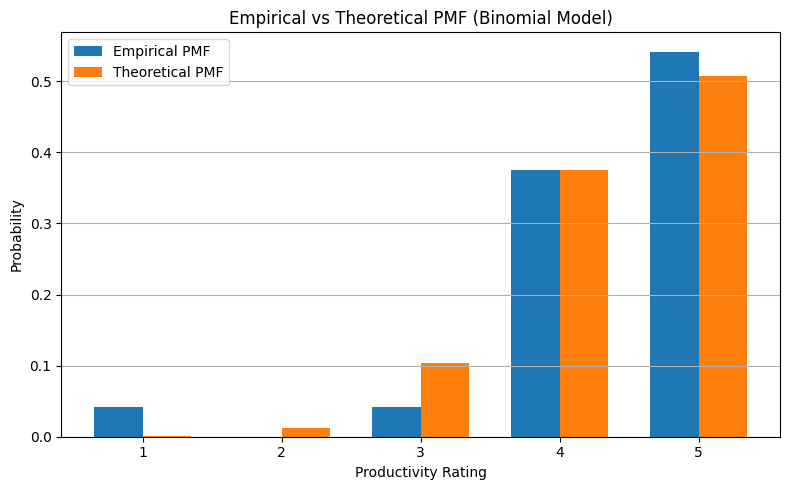

In [23]:
#Plotting comparison of Empirical vs Theoretical PMF
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = np.arange(1, 6)

plt.bar(x - bar_width/2, comparison_df["Empirical PMF"], width=bar_width, label="Empirical PMF")
plt.bar(x + bar_width/2, comparison_df["Theoretical PMF (Binomial)"], width=bar_width, label="Theoretical PMF")

plt.xlabel("Productivity Rating")
plt.ylabel("Probability")
plt.title("Empirical vs Theoretical PMF (Binomial Model)")
plt.xticks(x)
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Reflection & Insights

- **Variable Measured**: This study measured how students rate the impact of technology on academic productivity on a 1–5 scale.
- **Why It Matters**: Understanding students' perception of technology's value helps in optimizing tools for learning effectiveness.
- **Challenges Faced**: Most participants rated at the higher end, which made the distribution skewed and less diverse.
- **Model Fit**: A Binomial model was chosen based on the discrete, bounded nature of ratings. It fit reasonably well but didn’t capture the high bias toward the 5-rating.
- **Next Time**: To improve, I’d diversify participants and possibly add more questions to spread the responses.
